# Libraries

In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import dendrogram, linkage

## Load Data

In [18]:
# Example: upload CSV to Colab and load it
df = pd.read_csv('customers.csv')

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## Basic Data incpection

In [19]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicatessen      440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


# Feature Selection

In [20]:
df_clean = df.drop(columns=['Channel', 'Region'])
df_clean.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


# Feature Scaling

In [21]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

scaled_data[:5]

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       [ 0.10011141, -0.62401993, -0.3929769 ,  0.6871443 , -0.49858822,
         0.09341105],
       [ 0.84023948, -0.05239645, -0.07935618,  0.17385884, -0.23191782,
         1.29934689]])

# K-mean (k = 3)

In [22]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
baseline_labels = kmeans.fit_predict(scaled_data)

print("Inertia:", kmeans.inertia_)
print("Silhouette Score:", silhouette_score(scaled_data, baseline_labels))

Inertia: 1644.0598512347563
Silhouette Score: 0.4582633767207058


# Visualize Cluster

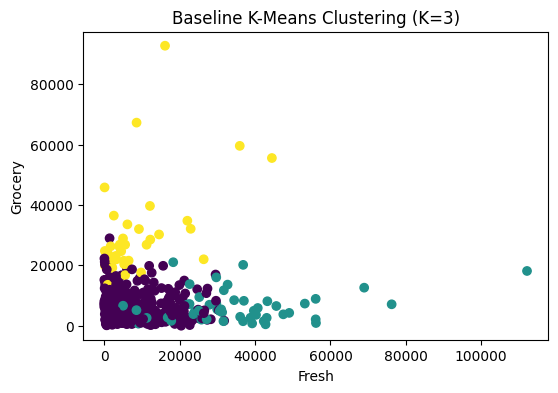

In [23]:
plt.figure(figsize=(6,4))
plt.scatter(
    df_clean['Fresh'],
    df_clean['Grocery'],
    c=baseline_labels,
    cmap='viridis'
)
plt.xlabel("Fresh")
plt.ylabel("Grocery")
plt.title("Baseline K-Means Clustering (K=3)")
plt.show()

# Elbow Method

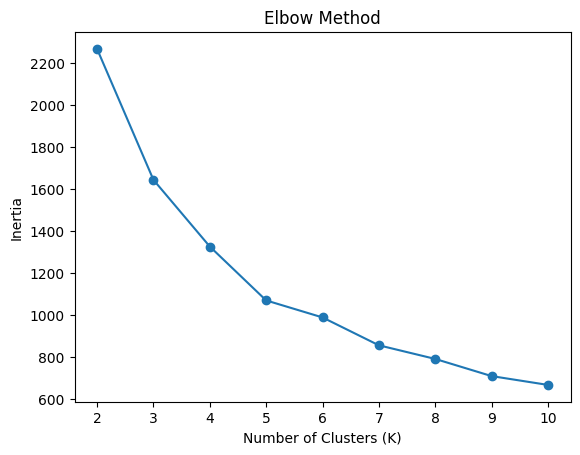

In [24]:
inertia = []

K_range = range(2, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# Silhoutte Method

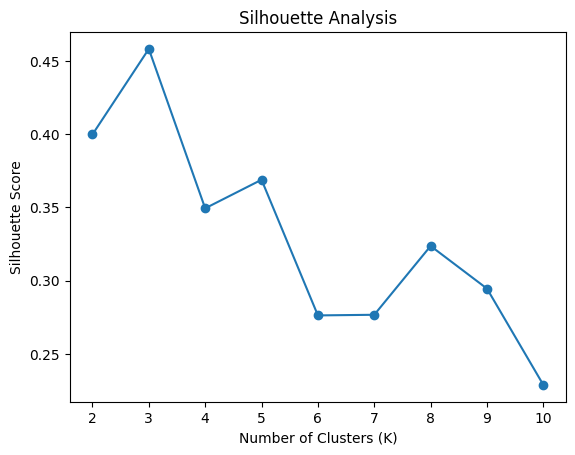

In [25]:
sil_scores = []

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(scaled_data)
    sil_scores.append(silhouette_score(scaled_data, labels))

plt.plot(K_range, sil_scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()

# Train Optimize K-means

In [26]:
optimal_k = 4

final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_labels = final_kmeans.fit_predict(scaled_data)

final_labels[:10]

array([3, 0, 0, 3, 3, 3, 3, 3, 3, 0], dtype=int32)

# Hierarchical Clustering

In [27]:
agg = AgglomerativeClustering(
    n_clusters=optimal_k,
    linkage='ward'
)

hier_labels = agg.fit_predict(scaled_data)

# Dendrogram

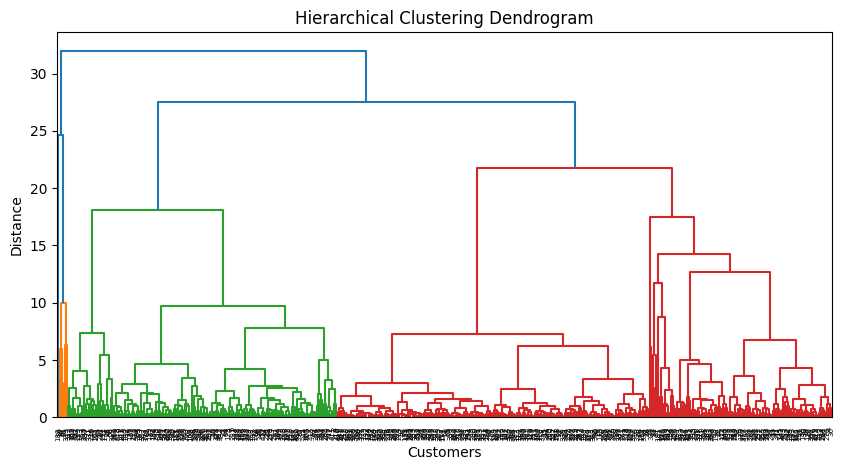

In [28]:
linked = linkage(scaled_data, method='ward')

plt.figure(figsize=(10,5))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

# Compare K-Means vs Hierarchical

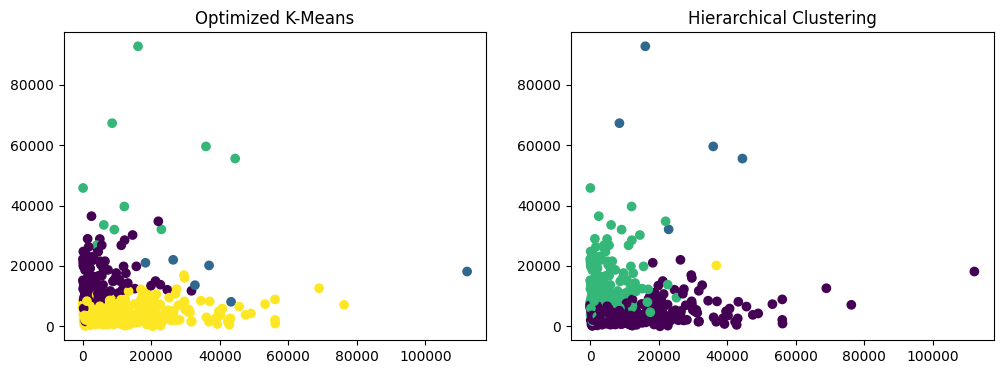

In [29]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(df_clean['Fresh'], df_clean['Grocery'], c=final_labels)
plt.title("Optimized K-Means")

plt.subplot(1,2,2)
plt.scatter(df_clean['Fresh'], df_clean['Grocery'], c=hier_labels)
plt.title("Hierarchical Clustering")

plt.show()